# Distributions

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [4]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [5]:
!pip install empiricaldist

  Preparing metadata (setup.py) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11958 sha256=9853c94652aef2328ef443abd08460c9822985b5ceea39230a8bd0b48045ac11
  Stored in directory: /home/maolp/.cache/pip/wheels/1a/33/5a/05bbe93cd4709e7a777f8379efb54114a8f7f6dcb3787805fb
Successfully built empiricaldist


In [14]:
!pip install scipy
!pip install statsmodels
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [8]:
import scipy

ModuleNotFoundError: No module named 'scipy'

In [10]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

In [15]:
from utils import set_pyplot_params
set_pyplot_params()

In the previous chapter we used Bayes's Theorem to solve a cookie problem; then we solved it again using a Bayes table.
In this chapter, at the risk of testing your patience, we will solve it one more time using a `Pmf` object, which represents a "probability mass function".
I'll explain what that means, and why it is useful for Bayesian statistics.

We'll use `Pmf` objects to solve some more challenging problems and take one more step toward Bayesian statistics.
But we'll start with distributions.
在上一章中，我们使用贝叶斯定理解决了一个 cookie 问题； 然后我们使用贝叶斯表再次解决它。
在本章中，冒着考验您的耐心的风险，我们将使用代表“概率质量函数”的“Pmf”对象再次解决它。
我将解释这意味着什么，以及为什么它对贝叶斯统计有用。

我们将使用 `Pmf` 对象来解决一些更具挑战性的问题，并朝着贝叶斯统计迈进一步。
但我们将从发行版开始。

## Distributions

In statistics a **distribution** is a set of possible outcomes and their corresponding probabilities.
For example, if you toss a coin, there are two possible outcomes with
approximately equal probability.
If you roll a six-sided die, the set of possible outcomes is the numbers 1 to 6, and the probability associated with each outcome is 1/6.

To represent distributions, we'll use a library called `empiricaldist`.
An "empirical" distribution is based on data, as opposed to a
theoretical distribution.
We'll use this library throughout the book.  I'll introduce the basic features in this chapter and we'll see additional features later.


## 分布

在统计学中，**分布**是一组可能的结果及其相应的概率。
例如，如果你掷硬币，有两种可能的结果
近似相等的概率。
如果你掷一个六面骰子，可能的结果集是数字 1 到 6，与每个结果相关的概率是 1/6。

为了表示分布，我们将使用一个名为“empiricaldist”的库。
“经验”分布基于数据，而不是
理论分布。
我们将在整本书中使用这个库。 我将在本章中介绍基本功能，稍后我们将看到其他功能。

## Probability Mass Functions

If the outcomes in a distribution are discrete, we can describe the distribution with a **probability mass function**, or PMF, which is a function that maps from each possible outcome to its probability.

`empiricaldist` provides a class called `Pmf` that represents a
probability mass function.
To use `Pmf` you can import it like this:

## 概率质量函数

如果分布中的结果是离散的，我们可以用**概率质量函数**或 PMF 来描述分布，这是一个从每个可能的结果映射到其概率的函数。

`empiricaldist` 提供了一个名为 `Pmf` 的类，它表示一个
概率质量函数。
要使用 `Pmf`，您可以像这样导入它：

In [16]:
from empiricaldist import Pmf

If that doesn't work, you might have to install `empiricaldist`; try running

```
!pip install empiricaldist
```

in a code cell or

```
pip install empiricaldist
```

in a terminal window.

The following example makes a `Pmf` that represents the outcome of a
coin toss.
以下示例生成一个表示结果的“Pmf”
掷硬币。

In [17]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


`Pmf` creates an empty `Pmf` with no outcomes.
Then we can add new outcomes using the bracket operator.
In this example, the two outcomes are represented with strings, and they have the same probability, 0.5.

`Pmf` 创建一个没有结果的空 `Pmf`。
然后我们可以使用括号运算符添加新的结果。
在本例中，两个结果用字符串表示，它们的概率相同，均为 0.5。

You can also make a `Pmf` from a sequence of possible outcomes.

The following example uses `Pmf.from_seq` to make a `Pmf` that represents a six-sided die.

您还可以从一系列可能的结果中创建一个“Pmf”。

以下示例使用 `Pmf.from_seq` 来制作代表六面骰子的 `Pmf`。

In [19]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In this example, all outcomes in the sequence appear once, so they all have the same probability, $1/6$.

More generally, outcomes can appear more than once, as in the following example:

在这个例子中，序列中的所有结果都出现一次，所以它们都有相同的概率，$1/6$。

更一般地，结果可以出现不止一次，如下例所示：

In [18]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


The letter `M` appears once out of 11 characters, so its probability is $1/11$.
The letter `i` appears 4 times, so its probability is $4/11$.

Since the letters in a string are not outcomes of a random process, I'll use the more general term "quantities" for the letters in the `Pmf`.

The `Pmf` class inherits from a Pandas `Series`, so anything you can do with a `Series`, you can also do with a `Pmf`.

For example, you can use the bracket operator to look up a quantity and get the corresponding probability.

字母“M”在 11 个字符中出现一次，所以它的概率是 $1/11$。
字母“i”出现了 4 次，所以它的概率是 $4/11$。

由于字符串中的字母不是随机过程的结果，因此我将使用更通用的术语“数量”来表示“Pmf”中的字母。

`Pmf` 类继承自 Pandas `Series`，所以你可以用 `Series` 做任何事情，也可以用 `Pmf` 做。

例如，您可以使用括号运算符来查找一个数量并获得相应的概率。

In [20]:
letters['s']

0.36363636363636365

In the word "Mississippi", about 36% of the letters are "s".

However, if you ask for the probability of a quantity that's not in the distribution, you get a `KeyError`.

在“密西西比”这个词中，大约 36% 的字母是“s”。

但是，如果您询问不在分布中的数量的概率，您会得到一个“KeyError”。

In [21]:
try:
    letters['t']
except KeyError as e:
    print(type(e))

<class 'KeyError'>


You can also call a `Pmf` as if it were a function, with a letter in parentheses.

你也可以像调用函数一样调用“Pmf”，用括号括起来。

In [22]:
letters('s')

0.36363636363636365

If the quantity is in the distribution the results are the same. 
But if it is not in the distribution, the result is `0`, not an error.

如果数量在分布中，则结果是相同的。
但如果它不在分布中，则结果为 `0`，而不是错误。

In [23]:
letters('t')

0

With parentheses, you can also provide a sequence of quantities and get a sequence of probabilities.

使用括号，您还可以提供一系列数量并获得一系列概率。

In [24]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

The quantities in a `Pmf` can be strings, numbers, or any other type that can be stored in the index of a Pandas `Series`.
If you are familiar with Pandas, that will help you work with `Pmf` objects. 
But I will explain what you need to know as we go along.

`Pmf` 中的数量可以是字符串、数字或任何其他可以存储在 Pandas `Series` 索引中的类型。
如果您熟悉 Pandas，那将有助于您使用 `Pmf` 对象。
但我会在我们进行过程中解释您需要了解的内容。

## The Cookie Problem Revisited

In this section I'll use a `Pmf` to solve the cookie problem from <<_TheCookieProblem>>.
Here's the statement of the problem again:

> Suppose there are two bowls of cookies.
>
> * Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. 
>
> * Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.
>
> Now suppose you choose one of the bowls at random and, without looking, choose a cookie at random. If the cookie is vanilla, what is the probability that it came from Bowl 1?

Here's a `Pmf` that represents the two hypotheses and their prior probabilities:


## 重新审视 Cookie 问题

在本节中，我将使用 `Pmf` 来解决 <<_TheCookieProblem>> 中的 cookie 问题。
这是问题的陈述：

> 假设有两碗饼干。
>
> * 碗 1 包含 30 个香草饼干和 10 个巧克力饼干。
>
> * 碗 2 包含 20 个香草饼干和 20 个巧克力饼干。
>
> 现在假设你随机选择一个碗，并且不看，随机选择一个饼干。如果饼干是香草饼干，它来自第一碗的概率是多少？

这是一个代表两个假设及其先验概率的“Pmf”：

In [25]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


This distribution, which contains the prior probability for each hypothesis, is called (wait for it) the **prior distribution**.

To update the distribution based on new data (the vanilla cookie),
we multiply the priors by the likelihoods. The likelihood
of drawing a vanilla cookie from Bowl 1 is `3/4`. The likelihood
for Bowl 2 is `1/2`.

这个包含每个假设的先验概率的分布称为（等待它）**先验分布**。

要根据新数据（香草 cookie）更新分布，
我们将先验乘以可能性。可能性
从碗 1 中抽出香草饼干的次数是 `3/4`。可能性
碗 2 是“1/2”。

In [26]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


The result is the unnormalized posteriors; that is, they don't add up to 1.
To make them add up to 1, we can use `normalize`, which is a method provided by `Pmf`.

结果是未归一化的后验；也就是说，它们加起来不等于 1。
为了使它们加起来为 1，我们可以使用 `normalize`，这是 `Pmf` 提供的一种方法。

In [27]:
posterior.normalize()

0.625

The return value from `normalize` is the total probability of the data, which is $5/8$.

`posterior`, which contains the posterior probability for each hypothesis, is called (wait now) the **posterior distribution**.
`normalize` 的返回值是数据的总概率，即 $5/8$。

包含每个假设的后验概率的“后验”称为（现在等待）**后验分布**。

In [28]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


From the posterior distribution we can select the posterior probability for Bowl 1:
从后验分布中，我们可以选择碗 1 的后验概率：

In [29]:
posterior('Bowl 1')

0.6

And the answer is 0.6.

One benefit of using `Pmf` objects is that it is easy to do successive updates with more data.
For example, suppose you put the first cookie back (so the contents of the bowls don't change) and draw again from the same bowl.
If the second cookie is also vanilla, we can do a second update like this:

答案是 0.6。

使用“Pmf”对象的一个​​好处是很容易用更多的数据进行连续更新。
例如，假设你把第一块饼干放回去（所以碗里的东西不会改变），然后再从同一个碗里抽。
如果第二个 cookie 也是 vanilla，我们可以像这样进行第二次更新：

In [30]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


Now the posterior probability for Bowl 1 is almost 70%.
But suppose we do the same thing again and get a chocolate cookie.

Here are the likelihoods for the new data:

现在碗 1 的后验概率几乎是 70%。
但是假设我们再次做同样的事情并得到一块巧克力饼干。

以下是新数据的可能性：

In [32]:
likelihood_chocolate = [0.25, 0.5]

And here's the update.

In [33]:
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


Now the posterior probability for Bowl 1 is about 53%.
After two vanilla cookies and one chocolate, the posterior probabilities are close to 50/50.

现在碗 1 的后验概率约为 53%。
在两块香草饼干和一块巧克力之后，后验概率接近 50/50。

## 101 Bowls

Next let's solve a cookie problem with 101 bowls:

* Bowl 0 contains 0% vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

As in the previous version, there are only two kinds of cookies, vanilla and chocolate.  So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla.  What is the probability that the cookie came from Bowl $x$, for each value of $x$?

To solve this problem, I'll use `np.arange` to make an array that represents 101 hypotheses, numbered from 0 to 100.


## 101 碗

接下来让我们用 101 个碗解决一个 cookie 问题：

* 碗 0 包含 0% 香草饼干，

* 碗 1 包含 1% 香草饼干，

* 碗 2 包含 2% 香草饼干，

依此类推，直到

* 碗 99 包含 99% 的香草饼干，和

* 碗 100 包含所有香草饼干。

和之前的版本一样，饼干只有两种，香草和巧克力。所以碗 0 都是巧克力饼干，碗 1 是 99% 的巧克力，依此类推。

假设我们随机选择一个碗，随机选择一个饼干，结果是香草。对于每个 $x$ 值，cookie 来自碗 $x$ 的概率是多少？

为了解决这个问题，我将使用 `np.arange` 创建一个表示 101 个假设的数组，编号从 0 到 100。

In [34]:
import numpy as np

hypos = np.arange(101)

We can use this array to make the prior distribution:
我们可以使用这个数组来进行先验分布：

In [35]:
prior = Pmf(1, hypos)
prior.normalize()

101

As this example shows, we can initialize a `Pmf` with two parameters.
The first parameter is the prior probability; the second parameter is a sequence of quantities.

In this example, the probabilities are all the same, so we only have to provide one of them; it gets "broadcast" across the hypotheses.
Since all hypotheses have the same prior probability, this distribution is **uniform**.

Here are the first few hypotheses and their probabilities.

如本例所示，我们可以使用两个参数初始化一个“Pmf”。
第一个参数是先验概率；第二个参数是数量序列。

在这个例子中，概率都是一样的，所以我们只需要提供其中一个；它通过假设“广播”。
由于所有假设都具有相同的先验概率，因此该分布是**一致的**。

以下是前几个假设及其概率。

In [36]:
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


The likelihood of the data is the fraction of vanilla cookies in each bowl, which we can calculate using `hypos`:

数据的可能性是每个碗中香草饼干的比例，我们可以使用 `hypos` 计算：

In [39]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]


array([0.  , 0.01, 0.02, 0.03, 0.04])

Now we can compute the posterior distribution in the usual way:

现在我们可以用通常的方式计算后验分布：

In [40]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


The following figure shows the prior distribution and the posterior distribution after one vanilla cookie.

下图显示了一个香草饼干后的先验分布和后验分布。

In [41]:
from utils import decorate

def decorate_bowls(title):
    decorate(xlabel='Bowl #',
             ylabel='PMF',
             title=title)

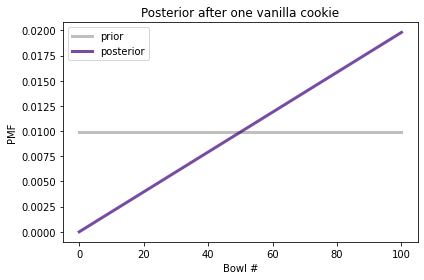

In [42]:
prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')

The posterior probability of Bowl 0 is 0 because it contains no vanilla cookies.
The posterior probability of Bowl 100 is the highest because it contains the most vanilla cookies.
In between, the shape of the posterior distribution is a line because the likelihoods are proportional to the bowl numbers.

Now suppose we put the cookie back, draw again from the same bowl, and get another vanilla cookie.
Here's the update after the second cookie:

碗 0 的后验概率为 0，因为它不包含香草饼干。
碗 100 的后验概率最高，因为它包含最多的香草饼干。
在两者之间，后验分布的形状是一条线，因为可能性与碗数成正比。

现在假设我们把饼干放回去，再从同一个碗里拿出来，再拿一块香草饼干。
这是第二个 cookie 之后的更新：

In [45]:
likelihood_vanilla

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [49]:
posterior2 = posterior1 * likelihood_vanilla ### 为何还是乘以原本的似然，似然是不变的吗？|因为他拿的是香草饼干，所以似然是不变的
## 比如如果拿的是草莓饼干，似然是变的，因为草莓饼干的似然是0.25，而香草饼干的似然是0.75
posterior2.normalize()

0.6699999999999999

And here's what the posterior distribution looks like.

这就是后验分布的样子。

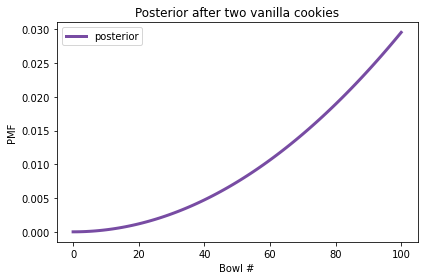

In [44]:
posterior2.plot(label='posterior', color='C4')
decorate_bowls('Posterior after two vanilla cookies')

After two vanilla cookies, the high-numbered bowls have the highest posterior probabilities because they contain the most vanilla cookies; the low-numbered bowls have the lowest probabilities.

But suppose we draw again and get a chocolate cookie.
Here's the update:

在两个香草饼干之后，高编号的碗具有最高的后验概率，因为它们包含最多的香草饼干；编号低的碗的概率最低。

但是假设我们再画一次，得到一块巧克力饼干。
这是更新：

In [47]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

0.2462686567164179

And here's the posterior distribution.
这是后验分布。

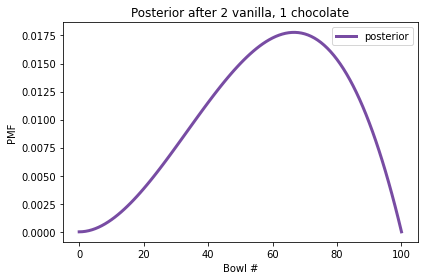

In [50]:
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after 2 vanilla, 1 chocolate')

Now Bowl 100 has been eliminated because it contains no chocolate cookies.
But the high-numbered bowls are still more likely than the low-numbered bowls, because we have seen more vanilla cookies than chocolate.

In fact, the peak of the posterior distribution is at Bowl 67, which corresponds to the fraction of vanilla cookies in the data we've observed, $2/3$.

The quantity with the highest posterior probability is called the **MAP**, which stands for "maximum a posteriori probability", where "a posteriori" is unnecessary Latin for "posterior".

To compute the MAP, we can use the `Series` method `idxmax`:

现在碗 100 已被淘汰，因为它不含巧克力饼干。
但是高编号的碗仍然比低编号的碗更有可能，因为我们看到的香草饼干多于巧克力。

事实上，后验分布的峰值出现在第 67 碗，这对应于我们观察到的数据中香草饼干的比例，即 2/3。

具有最高后验概率的量称为**MAP**，它代表“最大后验概率”，其中“ateriori”是不必要的拉丁语“后验”。

要计算 MAP，我们可以使用 `Series` 方法 `idxmax`：

In [52]:
posterior3.idxmax()  ##原来最大后验概率就是指概率分布的最大值

67

Or `Pmf` provides a more memorable name for the same thing:
或者 `Pmf` 为同一事物提供了一个更容易记住的名称：

In [53]:
posterior3.max_prob()

67

As you might suspect, this example isn't really about bowls; it's about estimating proportions.
Imagine that you have one bowl of cookies.
You don't know what fraction of cookies are vanilla, but you think it is equally likely to be any fraction from 0 to 1.
If you draw three cookies and two are vanilla, what proportion of cookies in the bowl do you think are vanilla?
The posterior distribution we just computed is the answer to that question.

We'll come back to estimating proportions in the next chapter.
But first let's use a `Pmf` to solve the dice problem.

您可能会怀疑，这个例子并不是关于碗的。这是关于估计比例。
想象一下，你有一碗饼干。
你不知道饼干中有多少是香草的，但你认为它同样可能是从 0 到 1 的任何分数。
如果你画三个饼干，两个是香草，你认为碗里的饼干占香草的比例是多少？
我们刚刚计算的后验分布就是该问题的答案。

我们将在下一章回到估计比例。
但首先让我们使用 `Pmf` 来解决骰子问题。

## The Dice Problem

In the previous chapter we solved the dice problem using a Bayes table.
Here's the statement of the problem:

> Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
> I choose one of the dice at random, roll it, and report that the outcome is a 1.
> What is the probability that I chose the 6-sided die?

Let's solve it using a `Pmf`.
I'll use integers to represent the hypotheses:

## 骰子问题

在上一章中，我们使用贝叶斯表解决了骰子问题。
这是问题的陈述：

> 假设我有一个盒子，里面有一个 6 面骰子、一个 8 面骰子和一个 12 面骰子。
> 我随机选择一个骰子，掷骰子，然后报告结果是 1。
> 我选择 6 面骰子的概率是多少？

让我们使用 `Pmf` 来解决它。
我将使用整数来表示假设：

In [54]:
hypos = [6, 8, 12]

We can make the prior distribution like this:
我们可以这样进行先验分布：


In [55]:
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


As in the previous example, the prior probability gets broadcast across the hypotheses.
The `Pmf` object has two attributes:

* `qs` contains the quantities in the distribution;

* `ps` contains the corresponding probabilities.

与前面的示例一样，先验概率会在假设中传播。
`Pmf` 对象有两个属性：

* `qs` 包含分布中的数量；

* `ps` 包含相应的概率。

In [56]:
prior.qs

array([ 6,  8, 12])

In [57]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

Now we're ready to do the update.
Here's the likelihood of the data for each hypothesis.

现在我们准备好进行更新了。
这是每个假设的数据的可能性。


In [58]:
likelihood1 = 1/6, 1/8, 1/12

And here's the update.

这是更新。

In [59]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


The posterior probability for the 6-sided die is $4/9$.

Now suppose I roll the same die again and get a 7.
Here are the likelihoods:

6 面骰子的后验概率是 $4/9$。

现在假设我再次掷相同的骰子并得到 7。
以下是可能性：

In [60]:
likelihood2 = 0, 1/8, 1/12

The likelihood for the 6-sided die is 0 because it is not possible to get a 7 on a 6-sided die.
The other two likelihoods are the same as in the previous update.

Here's the update:

6 面骰子的可能性为 0，因为不可能在 6 面骰子上得到 7。
其他两个可能性与之前的更新相同。

这是更新：

In [61]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


After rolling a 1 and a 7, the posterior probability of the 8-sided die is about 69%.

在掷出 1 和 7 后，8 面骰子的后验概率约为 69%。

## Updating Dice

The following function is a more general version of the update in the previous section:

## 更新骰子

以下函数是上一节中更新的更通用版本：

http://allendowney.github.io/ThinkBayes2/chap03.html 答案

In [62]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

The first parameter is a `Pmf` that represents the possible dice and their probabilities.
The second parameter is the outcome of rolling a die.

The first line selects quantities from the `Pmf` which represent the hypotheses.
Since the hypotheses are integers, we can use them to compute the likelihoods.
In general, if there are `n` sides on the die, the probability of any possible outcome is `1/n`.

However, we have to check for impossible outcomes!
If the outcome exceeds the hypothetical number of sides on the die, the probability of that outcome is 0.

`impossible` is a Boolean `Series` that is `True` for each impossible outcome.
I use it as an index into `likelihood` to set the corresponding probabilities to 0.

Finally, I multiply `pmf` by the likelihoods and normalize.

Here's how we can use this function to compute the updates in the previous section.
I start with a fresh copy of the prior distribution:

第一个参数是一个“Pmf”，表示可能的骰子及其概率。
第二个参数是掷骰子的结果。

第一行从代表假设的“Pmf”中选择数量。
由于假设是整数，我们可以使用它们来计算可能性。
一般来说，如果骰子上有“n”面，那么任何可能结果的概率都是“1/n”。

但是，我们必须检查不可能的结果！
如果结果超过骰子上的假设面数，则该结果的概率为 0。

`impossible` 是一个布尔型`Series`，对于每个不可能的结果都是`True`。
我将其用作“可能性”的索引，以将相应的概率设置为 0。

最后，我将“pmf”乘以可能性并归一化。

下面是我们如何使用这个函数来计算上一节中的更新。
我从先前发行版的新副本开始：


In [63]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


And use `update_dice` to do the updates.

并使用 `update_dice` 进行更新。

In [64]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


The result is the same.  We will see a version of this function in the next chapter.

结果是一样的。我们将在下一章看到这个函数的一个版本。

## Summary

This chapter introduces the `empiricaldist` module, which provides `Pmf`, which we use to represent a set of hypotheses and their probabilities.

`empiricaldist` is based on Pandas; the `Pmf` class inherits from the Pandas `Series` class and provides additional features specific to probability mass functions.
We'll use `Pmf` and other classes from `empiricaldist` throughout the book because they simplify the code and make it more readable.
But we could do the same things directly with Pandas.

We use a `Pmf` to solve the cookie problem and the dice problem, which we saw in the previous chapter.
With a `Pmf` it is easy to perform sequential updates with multiple pieces of data.

We also solved a more general version of the cookie problem, with 101 bowls rather than two.
Then we computed the MAP, which is the quantity with the highest posterior probability.

In the next chapter, I'll introduce the Euro problem, and we will use the binomial distribution.
And, at last, we will make the leap from using Bayes's Theorem to doing Bayesian statistics.

But first you might want to work on the exercises.

## 概括

本章介绍了 `empiricaldist` 模块，它提供了 `Pmf`，我们用它来表示一组假设及其概率。

`empiricaldist` 是基于 Pandas 的； `Pmf` 类继承自 Pandas `Series` 类，并提供特定于概率质量函数的附加功能。
我们将在整本书中使用 `Pmf` 和 `empiricaldist` 中的其他类，因为它们简化了代码并使其更具可读性。
但是我们可以直接用 Pandas 做同样的事情。

我们使用 `Pmf` 来解决我们在前一章中看到的 cookie 问题和 dice 问题。
使用 `Pmf` 很容易对多条数据执行顺序更新。

我们还用 101 个碗而不是两个碗解决了更通用的 cookie 问题。
然后我们计算了 MAP，它是具有最高后验概率的量。

在下一章中，我将介绍欧元问题，我们将使用二项分布。
最后，我们将实现从使用贝叶斯定理到进行贝叶斯统计的飞跃。

但首先你可能想练习练习。

## Exercises

**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7.
What is the probability that I chose the 8-sided die?

You can use the `update_dice` function or do the update yourself.

**练习**：假设我有一个盒子，里面有一个 6 面骰子、一个 8 面骰子和一个 12 面骰子。
我随机选择一个骰子，掷四次，得到 1、3、5 和 7。
我选择 8 面骰子的概率是多少？

您可以使用 `update_dice` 功能或自己进行更新。

In [67]:
# Solution goes here
pmf = prior.copy()
pmf


,probs
6,0.333333
8,0.333333
12,0.333333


In [68]:
update_dice(pmf, 1)
pmf

,probs
6,0.444444
8,0.333333
12,0.222222


In [69]:
update_dice(pmf, 3)
pmf

,probs
6,0.551724
8,0.310345
12,0.137931


In [70]:
update_dice(pmf, 5)
pmf

,probs
6,0.646465
8,0.272727
12,0.080808


In [71]:
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


In [114]:
# 答案

pmf = prior.copy()
for data in [1, 3, 5, 7]:
    update_dice(pmf, data)
    
pmf

,probs
6,0.000000
8,0.835052
12,0.164948


**Exercise:** In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die.
But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided.
I choose a die, roll it, and get a 7.
What is the probability that I chose an 8-sided die?

Hint: To make the prior distribution, call `Pmf` with two parameters.

**练习：** 在先前版本的骰子问题中，先验概率是相同的，因为盒子包含每个骰子一个。
但是假设盒子包含 1 个 4 面骰子、2 个 6 面骰子、3 个 8 面骰子、4 个 12 面骰子和 5 个 20 面骰子。
我选择一个骰子，掷骰子，得到一个 7。
我选择 8 面骰子的概率是多少？

提示：要进行先验分布，请使用两个参数调用“Pmf”。

In [139]:
# Solution goes here
import pandas as pd
data=pd.Series([1,2,3,4,5])
prior2=(data/data.sum())
prior2

prior3 = pd.DataFrame(index=['4', '6', '8', '12','20'], columns=['probs'])
prior3['probs'] = prior2.values
prior3

,probs
4,0.066667
6,0.133333
8,0.200000
12,0.266667
20,0.333333


In [143]:
likelihood3=0,0,1/8,1/12,1/20
prior3['likehood'] = likelihood3
prior3['probs2'] = prior3['probs']*prior3['likehood']
prior3['probs'].sum()
prior3['probs3']=prior3['probs2']/prior3['probs2'].sum()
prior3

,probs,likehood,probs2,probs3
4,0.066667,0.000000,0.000000,0.000000
6,0.133333,0.000000,0.000000,0.000000
8,0.200000,0.125000,0.025000,0.391304
12,0.266667,0.083333,0.022222,0.347826
20,0.333333,0.050000,0.016667,0.260870


In [144]:
##答案

# Notice that I don't bother to normalize the prior.
# The `Pmf` gets normalized during the update, so we
# don't have to normalize it before.

ps = [1,2,3,4,5]
qs = [4,6,8,12,20]
pmf = Pmf(ps, qs)
update_dice(pmf, 7)
pmf

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


**Exercise:** Suppose I have two sock drawers.
One contains equal numbers of black and white socks.
The other contains equal numbers of red, green, and blue socks.
Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair.
What is the probability that the socks are white?

For simplicity, let's assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

**练习**：假设我有两个袜子抽屉。
一个包含相同数量的黑白袜子。
另一个包含相同数量的红色、绿色和蓝色袜子。
假设我随机选择一个抽屉，随机选择两只袜子，我告诉你我得到了一对。
袜子是白色的概率是多少？

为简单起见，我们假设两个抽屉里有这么多袜子，取出一只袜子对比例的影响可以忽略不计。

In [133]:
# # Solution goes here

import pandas as pd
prior4 = pd.DataFrame(index=['w1', 'R2'], columns=['probs'])
data=pd.Series([1/2,1/2])
prior4['probs'] = data.values
prior4
likelihood4=1/2,1/3
prior4['probs'] *= likelihood4
prior4['probs'].sum()
prior4['probs']=prior4['probs']/prior4['probs'].sum()
prior4

,probs
w1,0.6
R2,0.4


In [130]:
# Solution goes here
### 正确的答案
# Solution

# In the BlackWhite drawer, the probability of getting a match is 1/2
# In the RedGreenBlue drawer, the probability of a match is 1/3

hypos = ['BlackWhite', 'RedGreenBlue']
prior = Pmf(1/2, hypos)
likelihood = 1/2, 1/3
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
BlackWhite,0.6
RedGreenBlue,0.4


**Exercise:** Here's a problem from [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/):

> Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

**练习**这是 [贝叶斯数据分析](http://www.stat.columbia.edu/~gelman/book/) 中的一个问题：

> 埃尔维斯普雷斯利有一个双胞胎兄弟（出生时就去世了）。猫王是同卵双胞胎的概率是多少？

提示：1935 年，大约 2/3 的双胞胎是异卵的，1/3 的双胞胎是同卵的。

In [128]:
## 我的答案
prior6 = pd.DataFrame(index=['same', 'not'], columns=['probs'])

data=pd.Series([1/3,2/3])
prior6['probs'] = data.values
likelihood6=1/2,1/2
prior6['probs'] *= likelihood6
prior6['probs'].sum()

prior6['probs']/prior6['probs'].sum()

same    0.333333
not     0.666667
Name: probs, dtype: float64

In [129]:
# 正确答案
# Solution

# The trick to this question is to notice that Elvis's twin was a brother.
# If they were identical twins, it is certain they would be the same sex.  ###注意性别
# If they were fraternal twins, the likelihood is only 50%.

# Here's a solution using a Bayes table

import pandas as pd

table = pd.DataFrame(index=['identical', 'fraternal'])
table['prior'] = 1/3, 2/3
table['likelihood'] = 1, 1/2

table['unnorm'] = table['prior'] * table['likelihood']
prob_data = table['unnorm'].sum()

table['posterior'] = table['unnorm'] / prob_data
table

,prior,likelihood,unnorm,posterior
identical,0.333333,1.0,0.333333,0.5
fraternal,0.666667,0.5,0.333333,0.5


In [50]:
# Solution goes here

In [51]:
# Solution goes here